In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report

In [186]:
df = pd.read_csv("hf://datasets/GihanPramod99/House_Price/USA Housing Dataset.csv")

In [187]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [188]:
le_street = LabelEncoder()
df["new_street"] = le_street.fit_transform(df["street"])

le_city = LabelEncoder()
df["new_city"] = le_city.fit_transform(df["city"])

le_statezip = LabelEncoder()
df["new_statezip"] = le_statezip.fit_transform(df["statezip"])


In [202]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,new_street,new_city,new_statezip
0,376000.0,0.375,0.296296,0.100310,0.000695,0.8,0.0,0.0,0.5,0.126797,0.000000,0.947368,0.0,0.971555,0.809524,0.618421
1,800000.0,0.500,0.481481,0.327818,0.147909,0.4,0.0,0.0,0.5,0.414379,0.000000,0.938596,0.0,0.610839,0.166667,0.131579
2,2238888.0,0.625,0.962963,0.713547,0.120512,0.4,0.0,0.0,0.5,0.790850,0.176349,0.964912,0.0,0.860961,0.357143,0.223684
3,324000.0,0.375,0.333333,0.064943,0.000248,0.4,0.0,0.0,0.5,0.055948,0.041494,0.938596,0.0,0.922511,0.809524,0.736842
4,549900.0,0.625,0.407407,0.278180,0.005940,0.0,0.0,0.0,1.0,0.160784,0.302905,0.692982,0.0,0.043404,0.809524,0.855263


In [189]:
df.drop(["street", "city", "statezip","country","date"], axis=1, inplace=True)

In [190]:
print(df.head())
df.isnull().sum()

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   376000.0       3.0       2.00         1340      1384     3.0           0   
1   800000.0       4.0       3.25         3540    159430     2.0           0   
2  2238888.0       5.0       6.50         7270    130017     2.0           0   
3   324000.0       3.0       2.25          998       904     2.0           0   
4   549900.0       5.0       2.75         3060      7015     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      2008             0   
1     0          3        3540              0      2007             0   
2     0          3        6420            850      2010             0   
3     0          3         798            200      2007             0   
4     0          5        1600           1460      1979             0   

   new_street  new_city  new_statezip  
0        3962        34            47  


,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
sqft_above,0


In [191]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,new_street,new_city,new_statezip
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357,2041.557971,24.913043,38.826812
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535,1178.462071,11.650096,20.963485
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1020.750000,16.000000,21.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000,2040.500000,31.000000,41.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000,3064.250000,34.000000,56.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000,4078.000000,42.000000,76.000000


fiting the data in min max model

In [192]:
features =df.columns.drop('price')
model_minmax=MinMaxScaler()
df[features]=model_minmax.fit_transform(df[features])
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,new_street,new_city,new_statezip
0,376000.0,0.375,0.296296,0.100310,0.000695,0.8,0.0,0.0,0.5,0.126797,0.000000,0.947368,0.0,0.971555,0.809524,0.618421
1,800000.0,0.500,0.481481,0.327818,0.147909,0.4,0.0,0.0,0.5,0.414379,0.000000,0.938596,0.0,0.610839,0.166667,0.131579
2,2238888.0,0.625,0.962963,0.713547,0.120512,0.4,0.0,0.0,0.5,0.790850,0.176349,0.964912,0.0,0.860961,0.357143,0.223684
3,324000.0,0.375,0.333333,0.064943,0.000248,0.4,0.0,0.0,0.5,0.055948,0.041494,0.938596,0.0,0.922511,0.809524,0.736842
4,549900.0,0.625,0.407407,0.278180,0.005940,0.0,0.0,0.0,1.0,0.160784,0.302905,0.692982,0.0,0.043404,0.809524,0.855263


# Graph

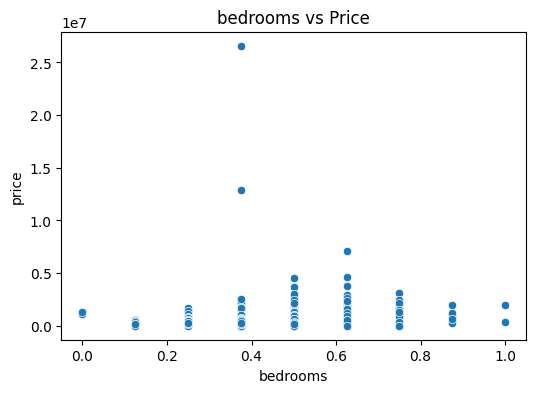

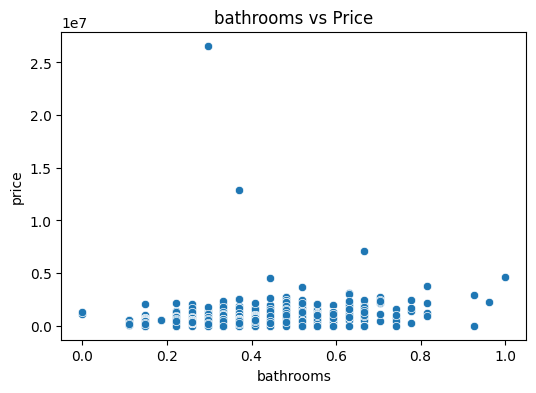

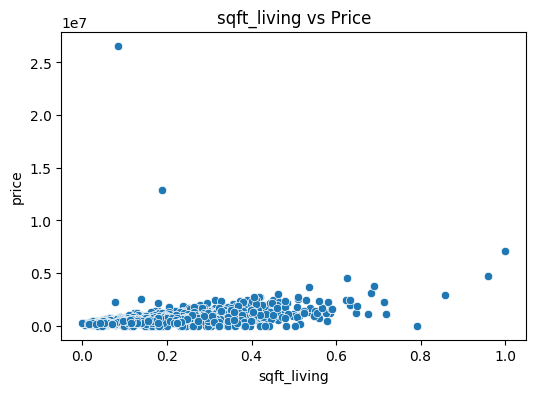

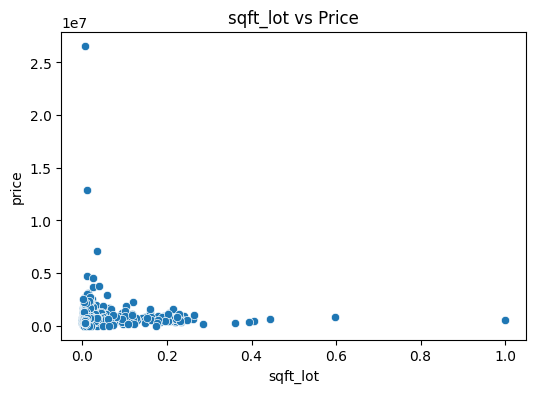

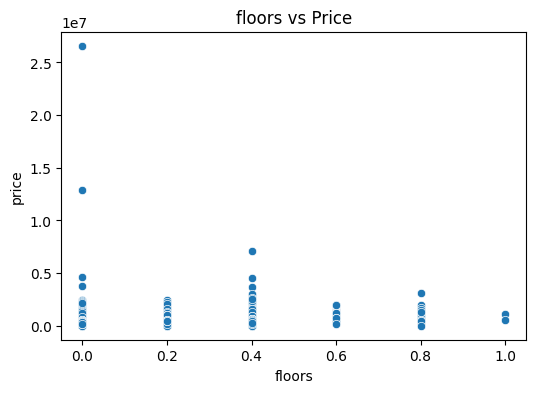

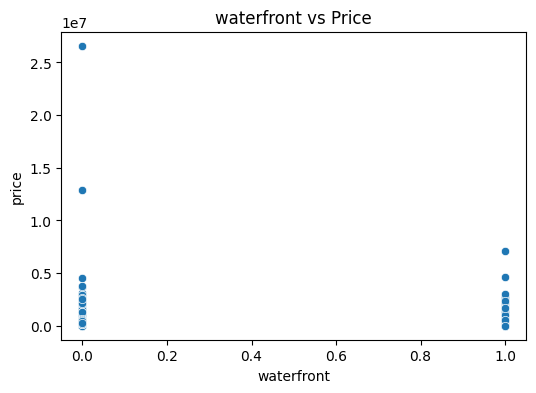

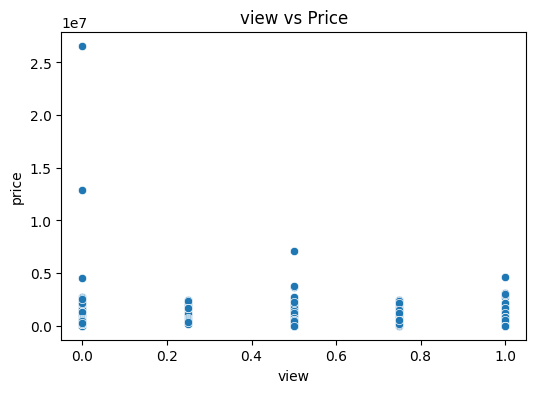

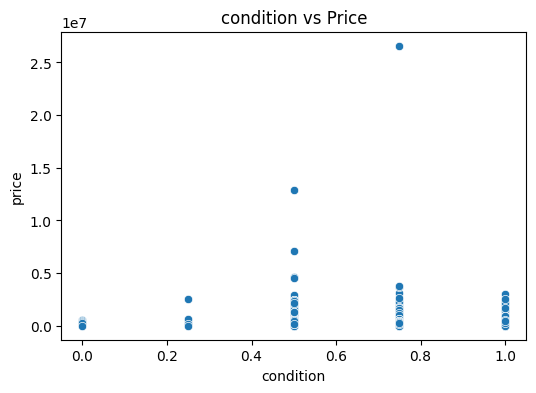

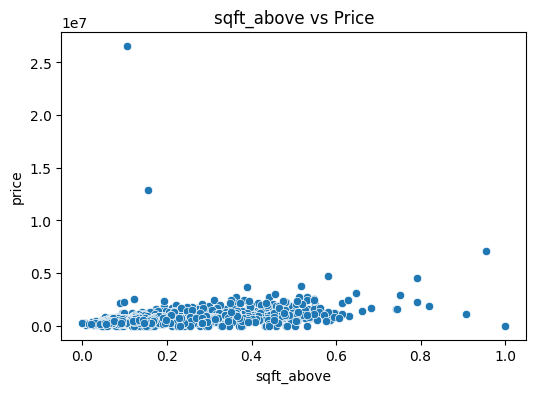

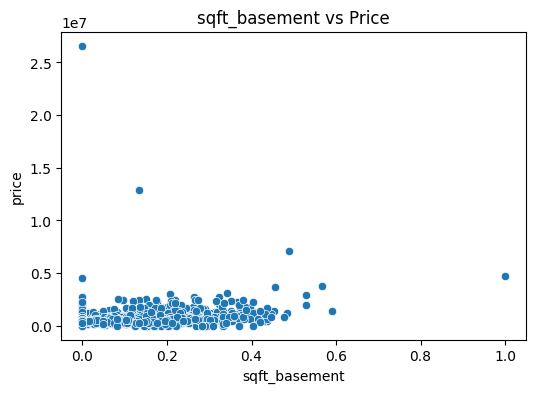

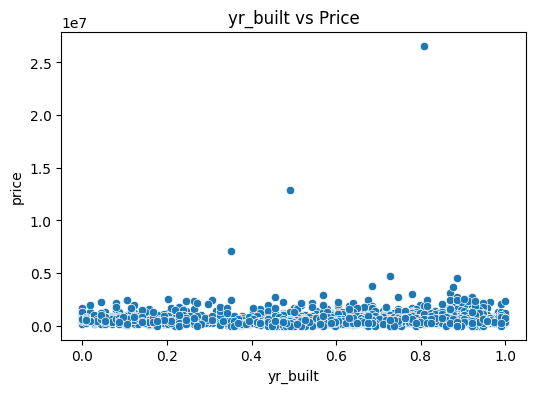

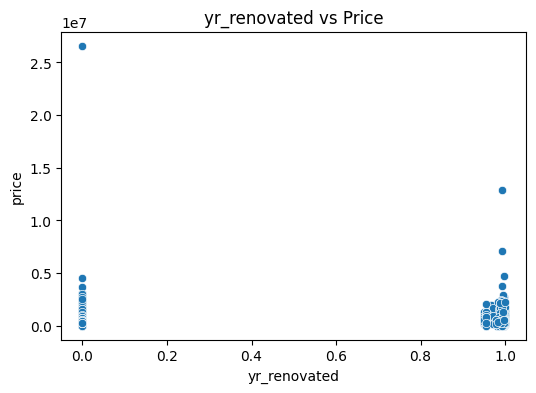

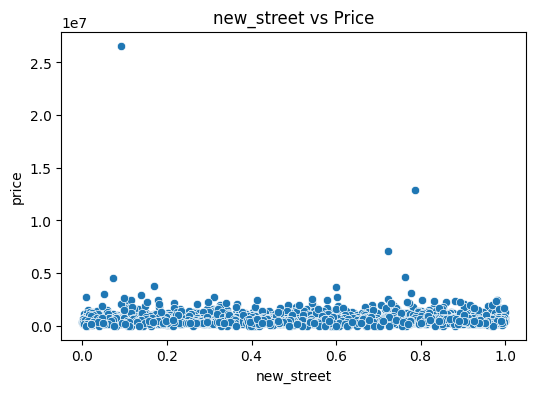

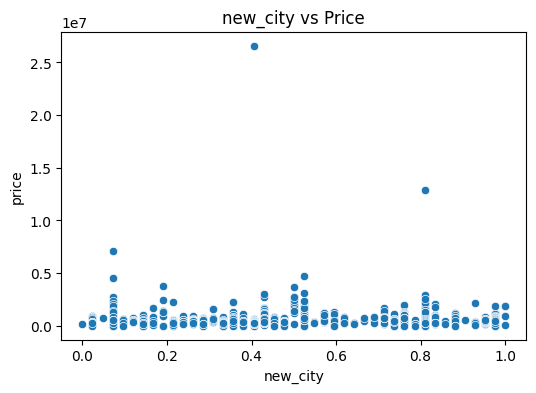

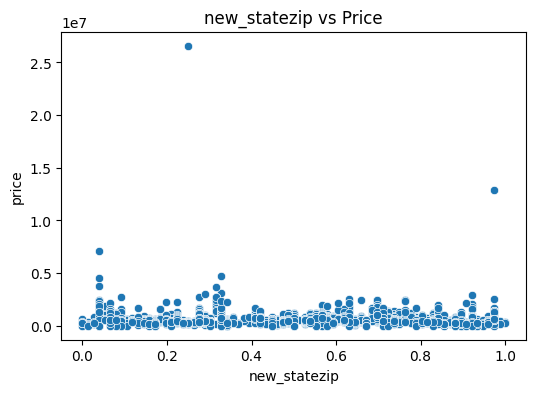

In [193]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.show()


In [194]:
x=df.drop("price",axis=1)
y=df["price"]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [196]:
X_train.shape

(3312, 15)

In [197]:
y_test.shape

(828,)

# linear_model

In [198]:
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [199]:
model_linear.score(X_train,y_train)

0.19409745578785031

# Applying random forest

In [200]:
model_random=RandomForestRegressor()
model_random.fit(X_train,y_train)
model_random.score(X_train,y_train)

0.873328031105146

# comparison of linear and random forst model

In [201]:
print(f"score of linear model is {model_linear.score(X_train,y_train)}")
print(f"score of random forest model is {model_random.score(X_train,y_train)}")

score of linear model is 0.19409745578785031
score of random forest model is 0.873328031105146


predicting the random value using boith random forst and linear regrestion mode

In [211]:
ne_feature=[0.375	,0.333333	,0.064943	,0.000248	,0.4	,0.0	,0.0	,0.5	,0.055948	,0.041494	,0.938596	,0.0	,0.922511	,0.809524	,0.736842]
print(model_random.predict([ne_feature]))
print(model_linear.predict([ne_feature]).round(2))

[324515.]
[186216.81]
